In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from PIL import Image

In [2]:
# Importamos nuestro dataset luego de hacer un tratamiento de valores nulos 
DATASET_PATH = '../data/null_filtered_sampled_data_2020_2019_02_03_04.parquet'
# Importamos un dataset que contiene, por cada fila, el código de zona y las coordenadas (latitud y longitud)
GEO_DATASET_PATH = '../data/NYC_Taxi_Zones_Centroids_ObjectID.csv'

In [3]:
raw_df =  pd.read_parquet(DATASET_PATH)
df = pd.read_csv(GEO_DATASET_PATH)

In [4]:
raw_df.describe()

tpep_pickup_datetime       tpep_dropoff_datetime  \
count                     1143978                     1143978   
mean   2019-06-28 16:24:59.181104  2019-06-28 16:42:02.639984   
min           2019-02-01 00:00:11         2019-02-01 00:03:03   
25%    2019-03-04 17:10:43.250000         2019-03-04 17:25:54   
50%           2019-04-04 21:16:26         2019-04-04 21:32:46   
75%           2020-02-08 09:23:32  2020-02-08 09:38:22.250000   
max           2020-04-30 23:43:06         2020-04-30 23:59:40   
std                           NaN                         NaN   

       passenger_count  trip_distance  PULocationID  DOLocationID  \
count     1.143978e+06   1.143978e+06  1.143978e+06  1.143978e+06   
mean      1.565471e+00   2.985833e+00  1.643795e+02  1.624412e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.000000e+00  1.250000e+02  1.130000e+02   
50%       1.000000e+00   1.680000e+00  1.620000e+02  1.620000e+02   
75%       2.000000e+00   3.040000e+00  2.340000e+02  2.340000e+02   
max       9.000000e+00   1.512000e+02  2.650000e+02  2.650000e+02   
std       1.188300e+00   3.808595e+00  6.552929e+01  6.985754e+01   

       payment_type   fare_amount         extra       mta_tax    tip_amount  \
count     1143978.0  1.143978e+06  1.143978e+06  1.143978e+06  1.143978e+06   
mean            1.0  1.308054e+01  1.156475e+00  4.970985e-01  2.996569e+00   
min             1.0  0.000000e+00 -2.000000e+00  0.000000e+00  0.000000e+00   
25%             1.0  6.500000e+00  0.000000e+00  5.000000e-01  1.700000e+00   
50%             1.0  9.500000e+00  5.000000e-01  5.000000e-01  2.350000e+00   
75%             1.0  1.450000e+01  2.500000e+00  5.000000e-01  3.360000e+00   
max             1.0  4.970000e+02  1.850000e+01  3.300000e+00  4.300000e+02   
std             0.0  1.166063e+01  1.264155e+00  3.808395e-02  2.780812e+00   

       tolls_amount  improvement_surcharge  total_amount         month  \
count  1.143978e+06           1.143978e+06  1.143978e+06  1.143978e+06   
mean   3.812180e-01           2.999567e-01  1.991843e+01  2.811175e+00   
min    0.000000e+00           0.000000e+00  0.000000e+00  2.000000e+00   
25%    0.000000e+00           3.000000e-01  1.180000e+01  2.000000e+00   
50%    0.000000e+00           3.000000e-01  1.535000e+01  3.000000e+00   
75%    0.000000e+00           3.000000e-01  2.130000e+01  3.000000e+00   
max    1.530000e+02           3.000000e-01  5.000000e+02  4.000000e+00   
std    1.637498e+00           3.602660e-03  1.474431e+01  7.898171e-01   

               year  trip_duration  
count  1.143978e+06   1.143978e+06  
mean   2.019302e+03   1.705765e+01  
min    2.019000e+03   1.666667e-02  
25%    2.019000e+03   6.783333e+00  
50%    2.019000e+03   1.116667e+01  
75%    2.020000e+03   1.803333e+01  
max    2.020000e+03   1.439950e+03  
std    4.589978e-01   6.482362e+01

In [5]:
zone_dicctionary = {
    "bronx": [199, 168, 126, 213, 208, 159, 147, 247, 69, 167, 212, 250, 58, 46, 119, 47, 59, 60, 248, 182, 183, 235, 169, 136, 94, 20, 31, 242, 220, 241, 18, 174, 32, 3, 51, 200, 240, 254, 81, 184, 259],
    "brooklyn": [55, 29, 150, 154, 108, 210, 21, 123, 149, 155, 11, 22, 178, 165, 91, 39, 67, 26, 89, 71, 72, 133, 222, 76, 14, 227, 111, 257, 190, 188, 85, 35, 77, 228, 181, 62, 61, 177, 63, 106, 189, 225, 37, 36, 17, 217, 256, 255, 112, 80, 49, 97, 34, 25, 65, 66, 195, 40, 54, 52, 33],
    "manhattan": [103, 104, 105, 12, 88, 87, 261, 13, 209, 45, 231, 232, 148, 144, 211, 125, 4, 79, 114, 113, 249, 158, 224, 107, 234, 90, 68, 246, 137, 164, 186, 100, 170, 233, 229, 162, 161, 230, 48, 50, 163, 202, 140, 141, 237, 142, 143, 262, 263, 236, 43, 239, 194, 75, 238, 151, 74, 41, 166, 42, 152, 116, 244, 120, 243, 127, 128, 153],
    "queens": [2, 30, 27, 201, 117, 86, 132, 124, 203, 180, 216, 10, 218, 219, 139, 38, 205, 215, 258, 197, 130, 122, 191, 96, 134, 28, 131, 102, 19, 101, 198, 160, 95, 135, 121, 98, 175, 64, 157, 196, 93, 192, 9, 16, 253, 92, 73, 171, 15, 53, 252, 57, 56, 173, 83, 82, 70, 129, 138, 226, 260, 207, 7, 223, 8, 146, 193, 179, 145],
    "staten_island": [44, 204, 84, 5, 109, 110, 99, 118, 176, 172, 214, 23, 6, 221, 115, 251, 156, 187, 245, 206]
}

In [6]:
def idToZone(id):
    for zone, ids in zone_dicctionary.items():
        if (id in ids):
            return zone
    return 'unkown'

In [7]:
zone_coordinates_dic = {
    "bronx": [40.866691, -73.877673],
    "brooklyn": [40.650336, -73.945012],
    "manhattan": [40.777663, -73.970815],
    "queens": [40.720672, -73.803229],
    "staten_island": [40.584828, -74.147520]
}

zone_coordinates = pd.DataFrame([{"zone": zone, "zone_lat": coords[0], "zone_lon": coords[1]} for zone, coords in zone_coordinates_dic.items()])

In [8]:
mask_2019 = raw_df.year == 2019
mask_2020 = raw_df.year == 2020

Analizamos el balance de las etiquetas de `PULocationID` y `DOLocationID` mediante un grafico de barras de la frecuencia absoluta ordenado de mayor a menos con linea de media:

In [9]:
def plot_locations_chart(data: pd.DataFrame, x: str, title):
    plt.figure(figsize=(100, 10))
    sns.countplot(data=data, x=x, order = data[x].value_counts().index)

    # Calcular y trazar la línea de media
    media = data[x].value_counts().mean()
    plt.axhline(media, color='red', linestyle='--')

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Frecuencia')
    plt.show()

Balance de clases de `PULocationID` 2019:

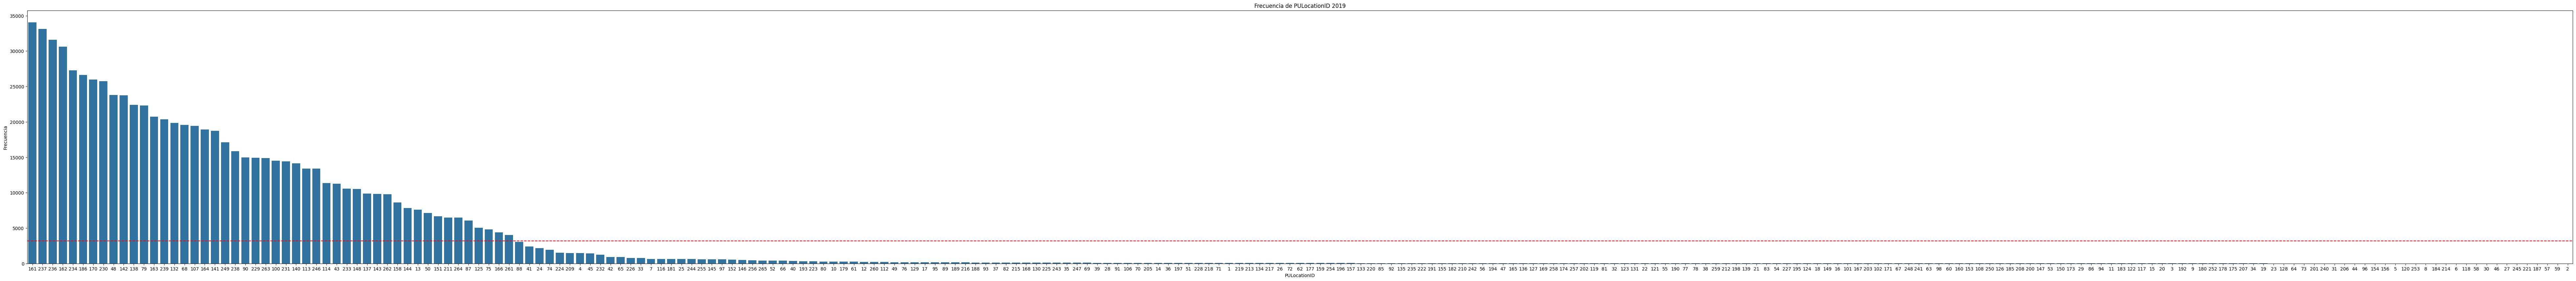

In [10]:
plot_locations_chart(data = raw_df[mask_2019], x = 'PULocationID', title = 'Frecuencia de PULocationID 2019')

Balance de clases de `DOLocationID` 2019:

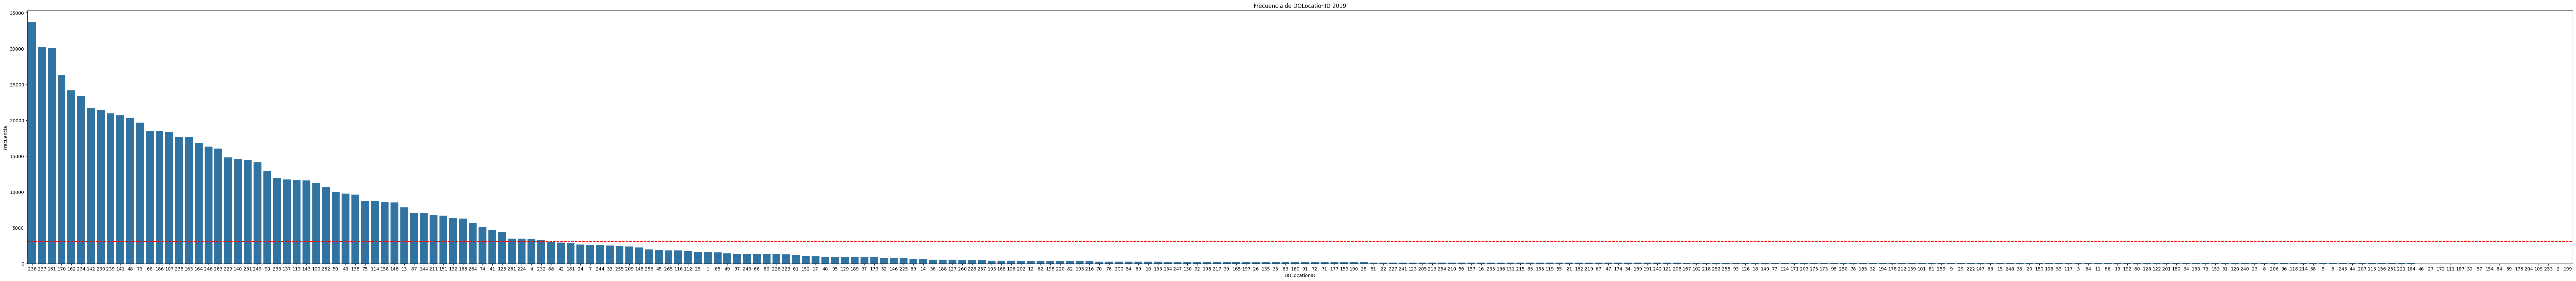

In [11]:
plot_locations_chart(data = raw_df[mask_2019], x = 'DOLocationID', title = 'Frecuencia de DOLocationID 2019')

Balance de clases de `PULocationID` 2020:

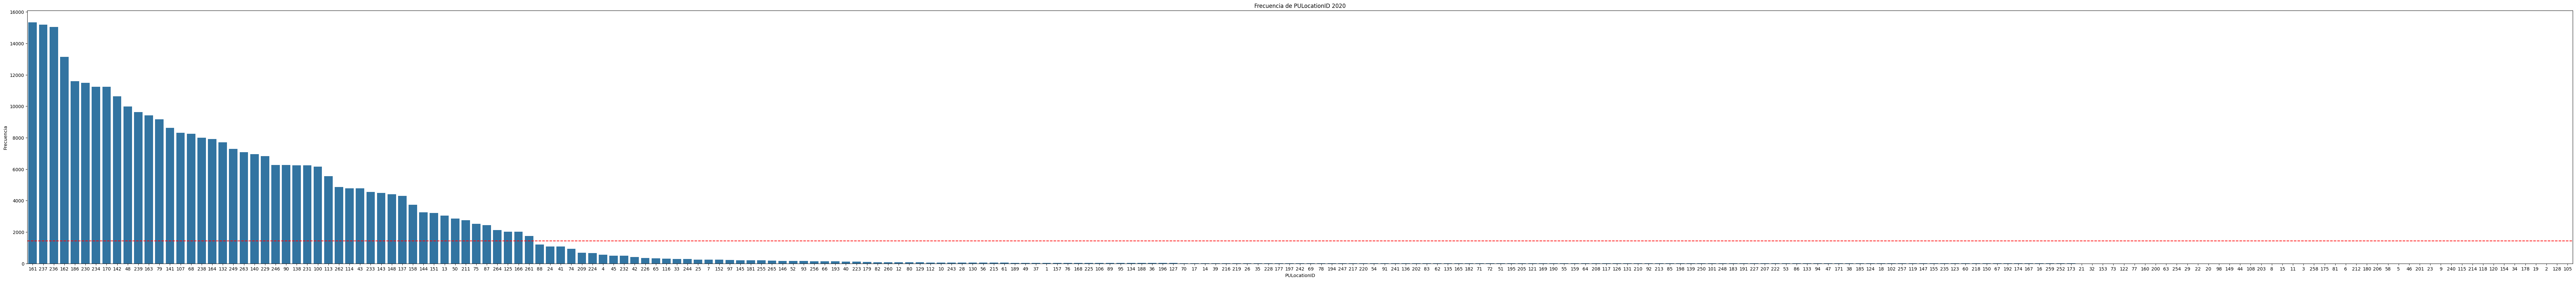

In [12]:
plot_locations_chart(data = raw_df[mask_2020], x = 'PULocationID', title = 'Frecuencia de PULocationID 2020')

Balance de clases de `DOLocationID` 2020:

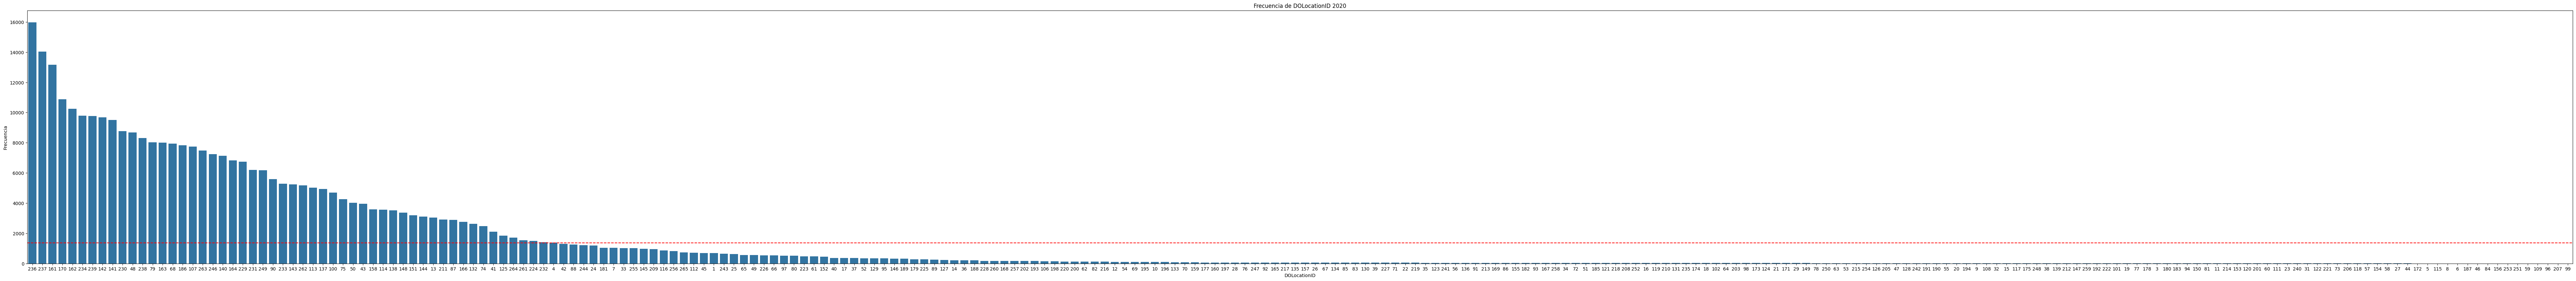

In [13]:
plot_locations_chart(data = raw_df[mask_2020], x = 'DOLocationID', title = 'Frecuencia de DOLocationID 2020')

Vemos un gran desbalance en la frecuencia de las etiquetas. Alrededor de 25% acumula la mayor frecuencia, siendo las demas etiquetas muy poco frecuentes. Procedemos a hacer un Top 15 de las mismas y etiquetamos las restantes como etiquetas poco frecuentes:

In [14]:
k = 10

top_k_categorias_pu_2019  = raw_df[mask_2019]['PULocationID'].value_counts().nlargest(k).index
top_k_categorias_do_2019  = raw_df[mask_2019]['DOLocationID'].value_counts().nlargest(k).index
top_k_categorias_pu_2020  = raw_df[mask_2020]['PULocationID'].value_counts().nlargest(k).index
top_k_categorias_do_2020  = raw_df[mask_2020]['DOLocationID'].value_counts().nlargest(k).index

raw_df.loc[mask_2019, 'mapped-PULocationID'] = raw_df[mask_2019]['PULocationID'].apply(lambda x: x if x in top_k_categorias_pu_2019 else -1)
raw_df.loc[mask_2019, 'mapped-DOLocationID'] = raw_df[mask_2019]['DOLocationID'].apply(lambda x: x if x in top_k_categorias_do_2019 else -1)

raw_df.loc[mask_2020, 'mapped-PULocationID'] = raw_df[mask_2020]['PULocationID'].apply(lambda x: x if x in top_k_categorias_pu_2020 else -1)
raw_df.loc[mask_2020, 'mapped-DOLocationID'] = raw_df[mask_2020]['DOLocationID'].apply(lambda x: x if x in top_k_categorias_do_2020 else -1)

In [15]:
mask_unfrequent_locations = (
    (raw_df['mapped-PULocationID'] == -1) |
    (raw_df['mapped-DOLocationID'] == -1)
)

raw_df = raw_df[~mask_unfrequent_locations]

In [16]:
# Calculamos las frecuencias absolutas para la columna de pick-up
pickup_count_2019 = raw_df[mask_2019]["mapped-PULocationID"].value_counts()
pickup_count_2020 = raw_df[mask_2020]["mapped-PULocationID"].value_counts()

#Transformamos de tipo Series a DataFrame
pickup_count_2019 = pd.DataFrame([{"objectid": zone, "pickup_count": count} for zone, count in pickup_count_2019.items()])
pickup_count_2020 = pd.DataFrame([{"objectid": zone, "pickup_count": count} for zone, count in pickup_count_2020.items()])

# Calculamos las frecuencias absolutas para la columna de drop-off
dropoff_count_2019 = raw_df[mask_2019]["mapped-DOLocationID"].value_counts()
dropoff_count_2020 = raw_df[mask_2020]["mapped-DOLocationID"].value_counts()

#Transformamos de tipo Series a DataFrame
dropoff_count_2019 = pd.DataFrame([{"objectid": zone, "dropoff_count": count} for zone, count in dropoff_count_2019.items()])
dropoff_count_2020 = pd.DataFrame([{"objectid": zone, "dropoff_count": count} for zone, count in dropoff_count_2020.items()])

C:\Users\andre\AppData\Local\Temp\ipykernel_8024\2989575414.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pickup_count_2019 = raw_df[mask_2019]["mapped-PULocationID"].value_counts()
C:\Users\andre\AppData\Local\Temp\ipykernel_8024\2989575414.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pickup_count_2020 = raw_df[mask_2020]["mapped-PULocationID"].value_counts()
C:\Users\andre\AppData\Local\Temp\ipykernel_8024\2989575414.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dropoff_count_2019 = raw_df[mask_2019]["mapped-DOLocationID"].value_counts()
C:\Users\andre\AppData\Local\Temp\ipykernel_8024\2989575414.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dropoff_count_2020 = raw_df[mask_2020]["mapped-DOLocationID"].value_counts()


In [17]:
# Mergeamos los dataframe con las coordenadas de las zonas
df_2019 = df.merge(pickup_count_2019, on='objectid', how='inner').merge(dropoff_count_2019, on='objectid', how='inner')
df_2020 = df.merge(pickup_count_2020, on='objectid', how='inner').merge(dropoff_count_2020, on='objectid', how='inner')

In [18]:
df_2019["zone"] = df_2019.objectid.apply(idToZone)
df_2020["zone"] = df_2020.objectid.apply(idToZone)

In [19]:
df_2019 = df_2019[~(df_2019.zone == "unkown")]
df_2020 = df_2020[~(df_2020.zone == "unkown")]

In [20]:
# Agregamos las coordenadas de los distritos
df_2019 = df_2019.merge(zone_coordinates, on="zone", how='inner')
df_2020 = df_2020.merge(zone_coordinates, on="zone", how='inner')

In [21]:
df_2019

objectid  centroid_lon  centroid_lat  pickup_count  dropoff_count  \
0       142    -73.981532     40.773633          9622           8700   
1       161    -73.977698     40.758028         12944          13530   
2       162    -73.972356     40.756688         10954          10390   
3       170    -73.978492     40.747746          8519          10356   
4       230    -73.984196     40.759818          7558           8761   
5       234    -73.990458     40.740337          7183           8677   
6       236    -73.957012     40.780436         16966          16260   
7       237    -73.965635     40.768615         18378          15664   

        zone   zone_lat   zone_lon  
0  manhattan  40.777663 -73.970815  
1  manhattan  40.777663 -73.970815  
2  manhattan  40.777663 -73.970815  
3  manhattan  40.777663 -73.970815  
4  manhattan  40.777663 -73.970815  
5  manhattan  40.777663 -73.970815  
6  manhattan  40.777663 -73.970815  
7  manhattan  40.777663 -73.970815

In [32]:
df_2020

objectid  centroid_lon  centroid_lat  pickup_count  dropoff_count  \
0       142    -73.981532     40.773633          4437           3959   
1       161    -73.977698     40.758028          5795           6004   
2       162    -73.972356     40.756688          4735           4461   
3       170    -73.978492     40.747746          3747           4353   
4       230    -73.984196     40.759818          3397           3505   
5       234    -73.990458     40.740337          3013           3737   
6       236    -73.957012     40.780436          8106           7679   
7       237    -73.965635     40.768615          8465           7444   

        zone   zone_lat   zone_lon  
0  manhattan  40.777663 -73.970815  
1  manhattan  40.777663 -73.970815  
2  manhattan  40.777663 -73.970815  
3  manhattan  40.777663 -73.970815  
4  manhattan  40.777663 -73.970815  
5  manhattan  40.777663 -73.970815  
6  manhattan  40.777663 -73.970815  
7  manhattan  40.777663 -73.970815

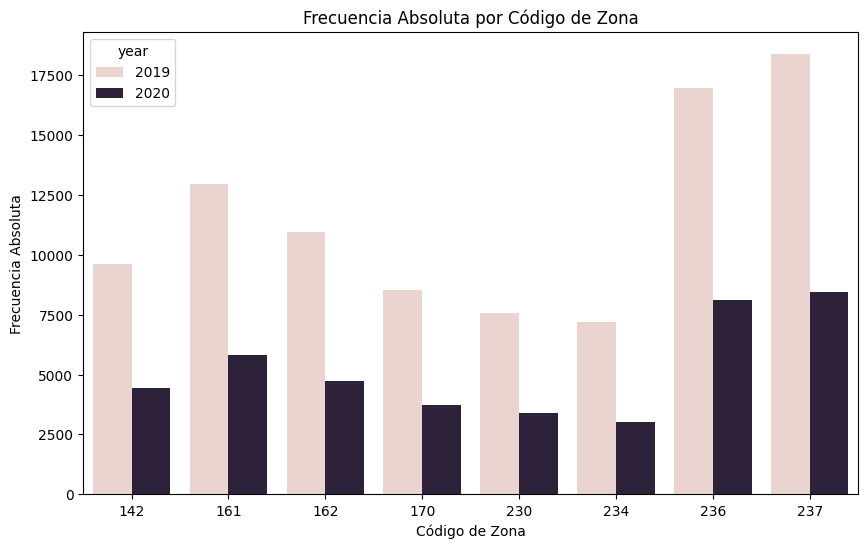

In [39]:
df_2019['year'] = 2019
df_2020['year'] = 2020

df = pd.concat([df_2019, df_2020]).sort_values('pickup_count')

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='objectid', y='pickup_count', data=df, hue=df['year'])

# Añadir etiquetas y título (opcional)
plt.xlabel('Código de Zona')
plt.ylabel('Frecuencia Absoluta')
plt.title('Frecuencia Absoluta por Código de Zona')

# Mostrar el gráfico
plt.show()

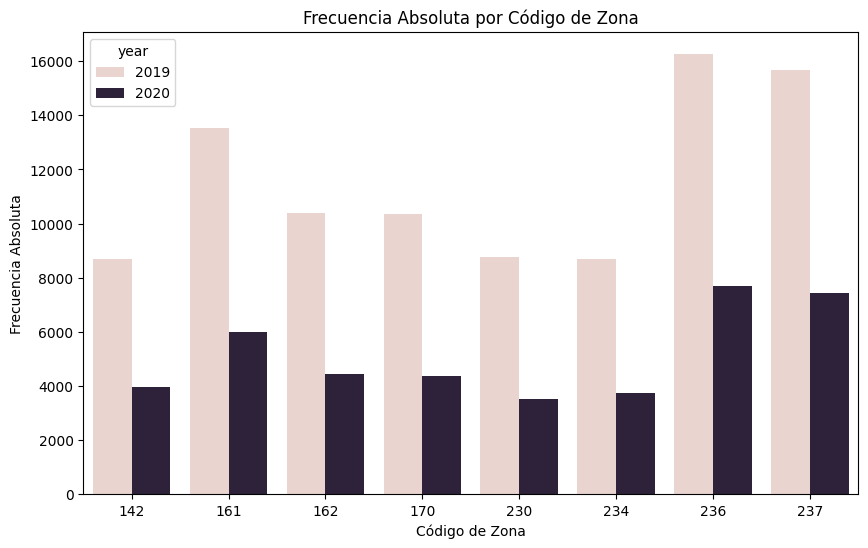

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='objectid', y='dropoff_count', data=df, hue=df['year'])

# Añadir etiquetas y título (opcional)
plt.xlabel('Código de Zona')
plt.ylabel('Frecuencia Absoluta')
plt.title('Frecuencia Absoluta por Código de Zona')

# Mostrar el gráfico
plt.show()

In [22]:
# Cargamos la imagen del mapa de Nueva York
ny_map = Image.open('../data/map.png')
# Creamos un diccionario con las coordenadas de los limites de la imagen
ny_image_boundaries_coordinates = {
    "left": -74.2676,
    "top": 40.9229,
    "right": -73.7080,
    "bottom": 40.4971
}

In [23]:
# Declaramos una funcion para crear el heatmap
from pandas import Series

def plot_heatmap(x: Series, y: Series, freq: Series, ax, title: str, image: Image, boundaries: dict, bw_adjust: int = 0.5):
    ax.imshow(image, extent=[boundaries["left"], boundaries["right"], boundaries["bottom"], boundaries["top"]])
    sns.kdeplot(
        x=x,
        y=y,
        weights=freq,
        cmap="coolwarm",
        fill=True,
        alpha=0.3,
        ax=ax,
        # Ajustamos este parametro para no tener
        # la funcion tan suavizada, ya que queremos
        # ver zonas con mayor frecuencia
        bw_adjust=bw_adjust
    )
    ax.set_xlim(boundaries["left"], boundaries["right"])
    ax.set_ylim(boundaries["bottom"], boundaries["top"])
    ax.grid(False)
    ax.set_title(title)

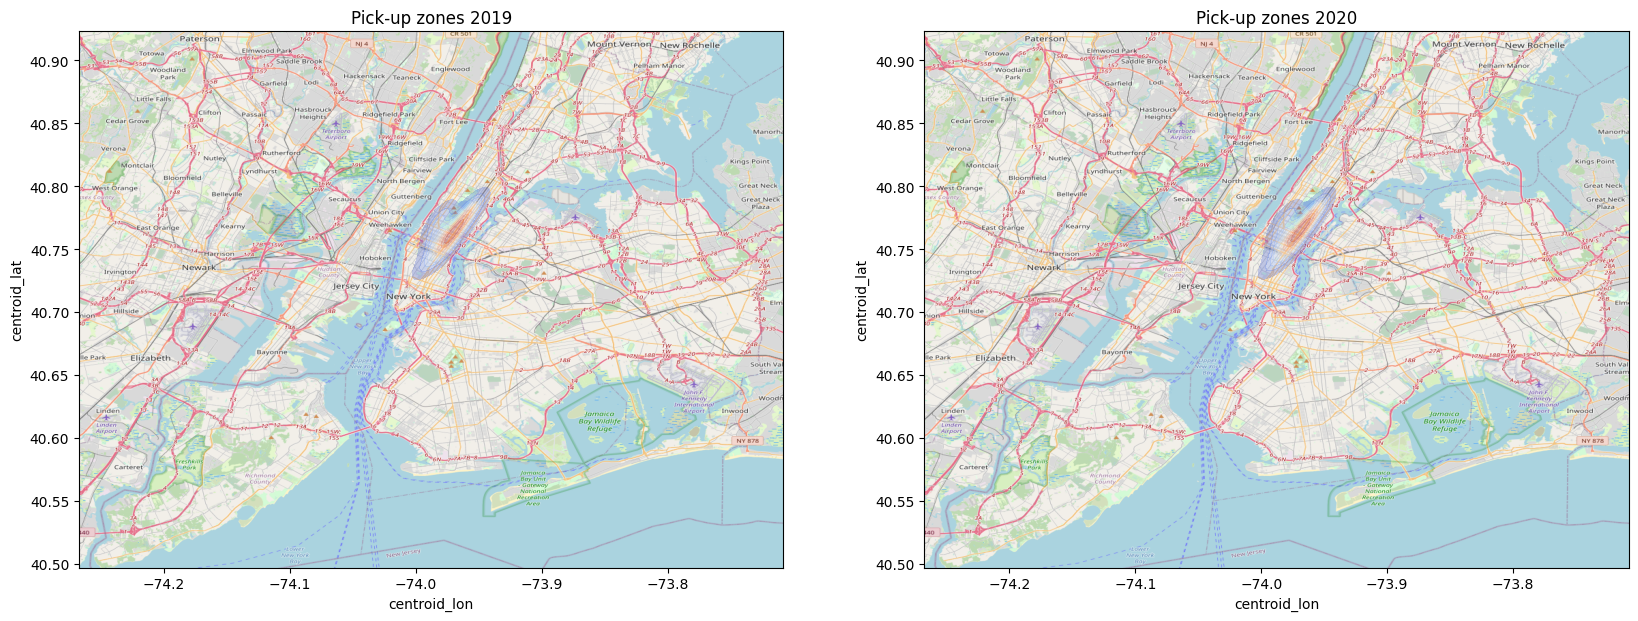

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    df_2019['centroid_lon'],
    df_2019['centroid_lat'],
    df_2019['pickup_count'],
    axs[0],
    "Pick-up zones 2019",
    ny_map,
    ny_image_boundaries_coordinates,
    1
)

plot_heatmap(
    df_2020['centroid_lon'],
    df_2020['centroid_lat'],
    df_2020['pickup_count'],
    axs[1],
    "Pick-up zones 2020",
    ny_map,
    ny_image_boundaries_coordinates,
    1
)

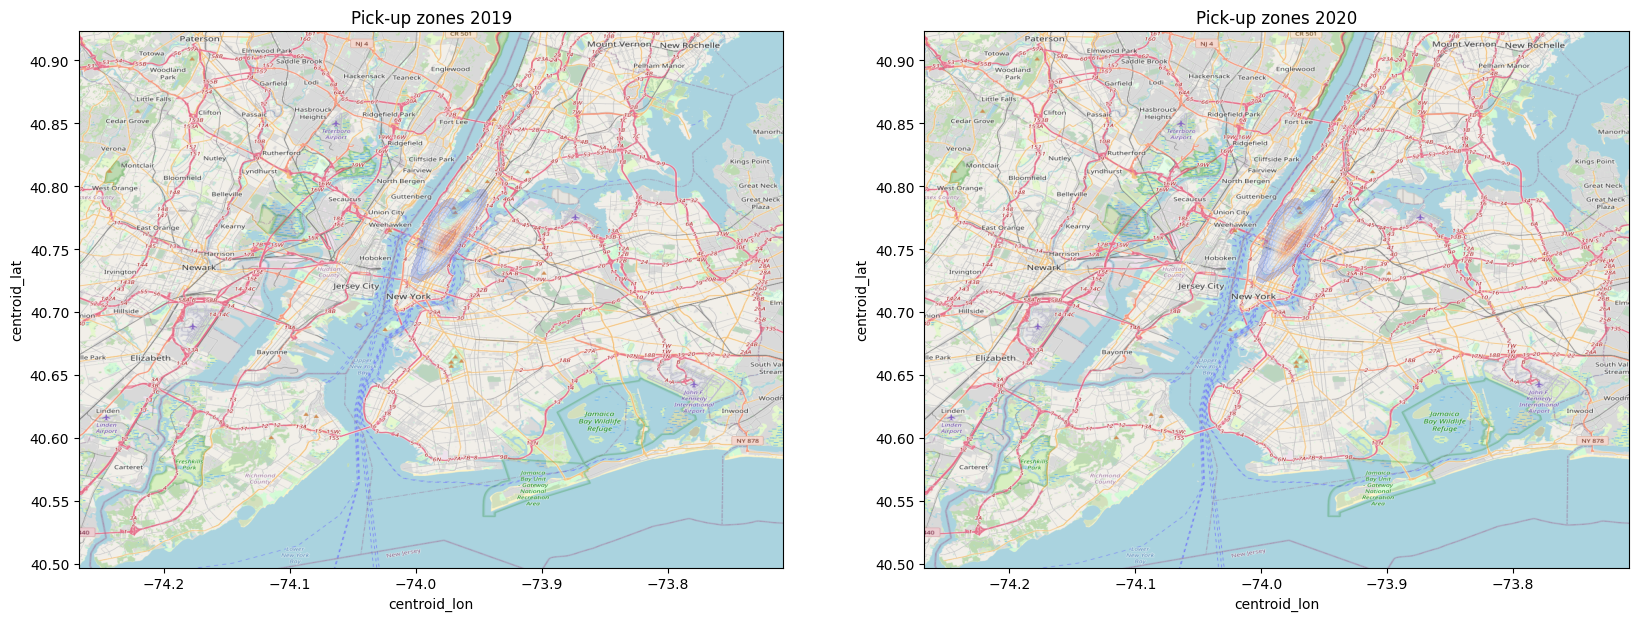

In [25]:
fig2, axs2 = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    df_2019['centroid_lon'],
    df_2019['centroid_lat'],
    np.log(df_2019['pickup_count']),
    axs2[0],
    "Pick-up zones 2019",
    ny_map,
    ny_image_boundaries_coordinates,
    # Ajustamos el parametro bw_adjust
    1
)

plot_heatmap(
    df_2020['centroid_lon'],
    df_2020['centroid_lat'],
    np.log(df_2020['pickup_count']),
    axs2[1],
    "Pick-up zones 2020",
    ny_map,
    ny_image_boundaries_coordinates,
    1
)

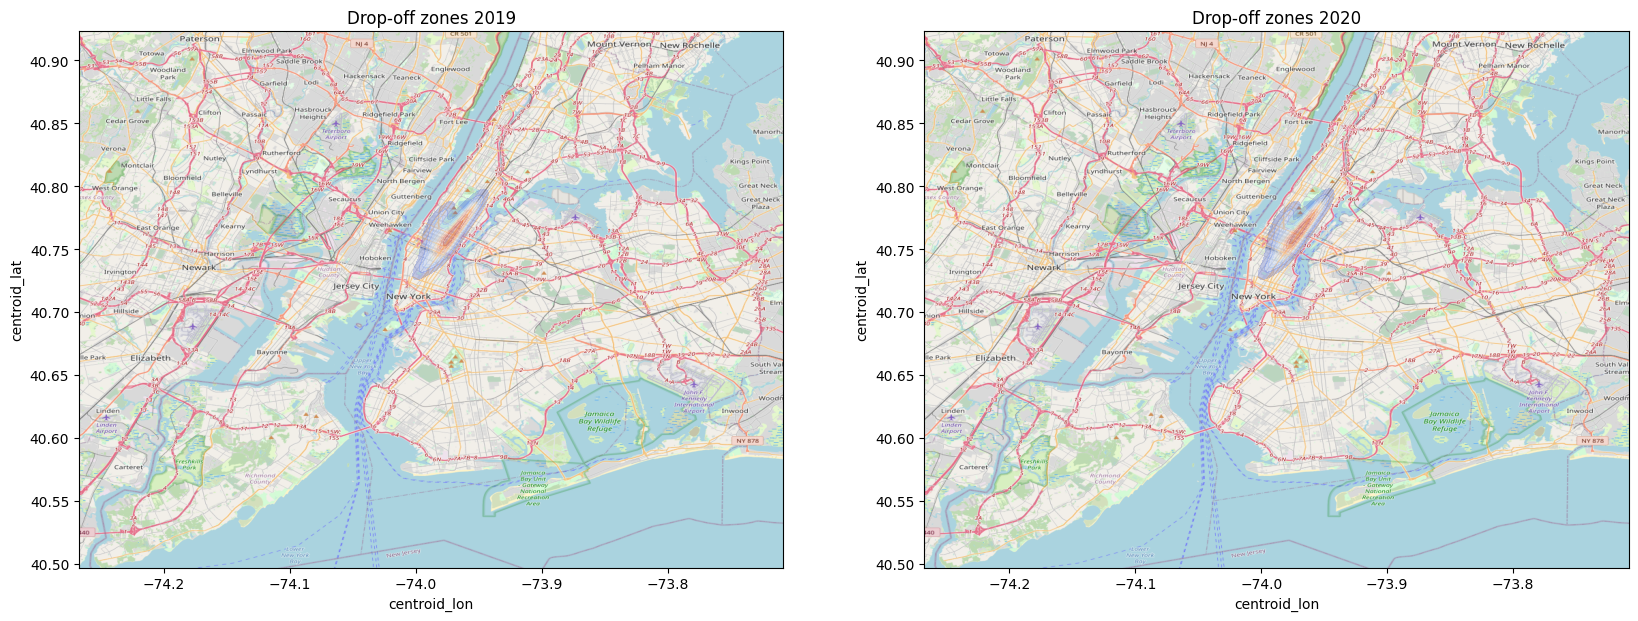

In [26]:
fig3, axs3 = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    df_2019['centroid_lon'],
    df_2019['centroid_lat'],
    df_2019['dropoff_count'],
    axs3[0],
    "Drop-off zones 2019",
    ny_map,
    ny_image_boundaries_coordinates,
    0.9
)

plot_heatmap(
    df_2020['centroid_lon'],
    df_2020['centroid_lat'],
    df_2020['dropoff_count'],
    axs3[1],
    "Drop-off zones 2020",
    ny_map,
    ny_image_boundaries_coordinates,
    0.9
)

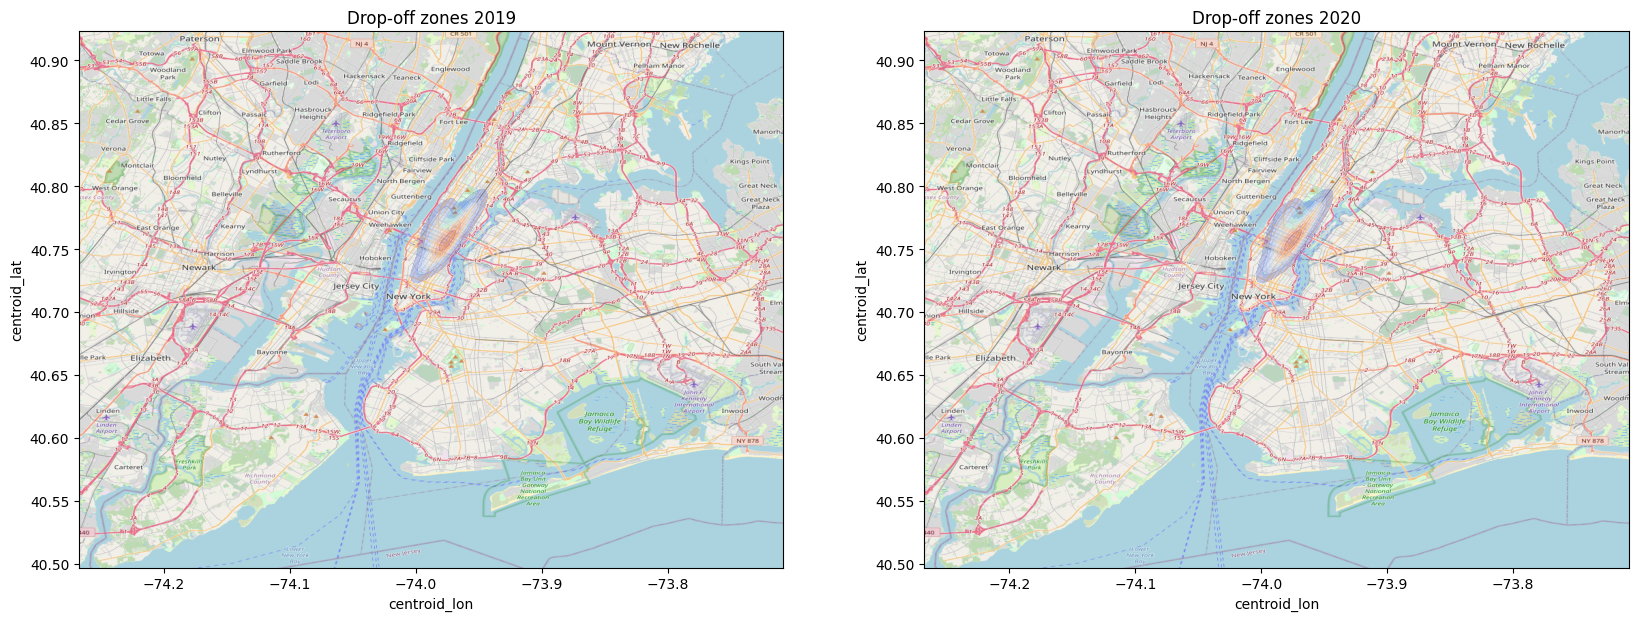

In [27]:
fig4, axs4 = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    df_2019['centroid_lon'],
    df_2019['centroid_lat'],
    np.log(df_2019['dropoff_count']),
    axs4[0],
    "Drop-off zones 2019",
    ny_map,
    ny_image_boundaries_coordinates,
    1
)

plot_heatmap(
    df_2020['centroid_lon'],
    df_2020['centroid_lat'],
    np.log(df_2020['dropoff_count']),
    axs4[1],
    "Drop-off zones 2020",
    ny_map,
    ny_image_boundaries_coordinates,
    1
)

In [28]:
# Cargamos la imagen del mapa de Manhattan
manhattan_map = Image.open('../data/manhattan-map.png')
# Creamos un diccionario con las coordenadas de los limites de la imagen
manhattan_image_boundaries_coordinates = {
    "left": -74.0242,
    "top": 40.8806,
    "right": -73.9050,
    "bottom": 40.6970
}

In [29]:
manhattan_2019_df = df_2019[df_2019.zone == 'manhattan']
manhattan_2020_df = df_2020[df_2020.zone == 'manhattan']

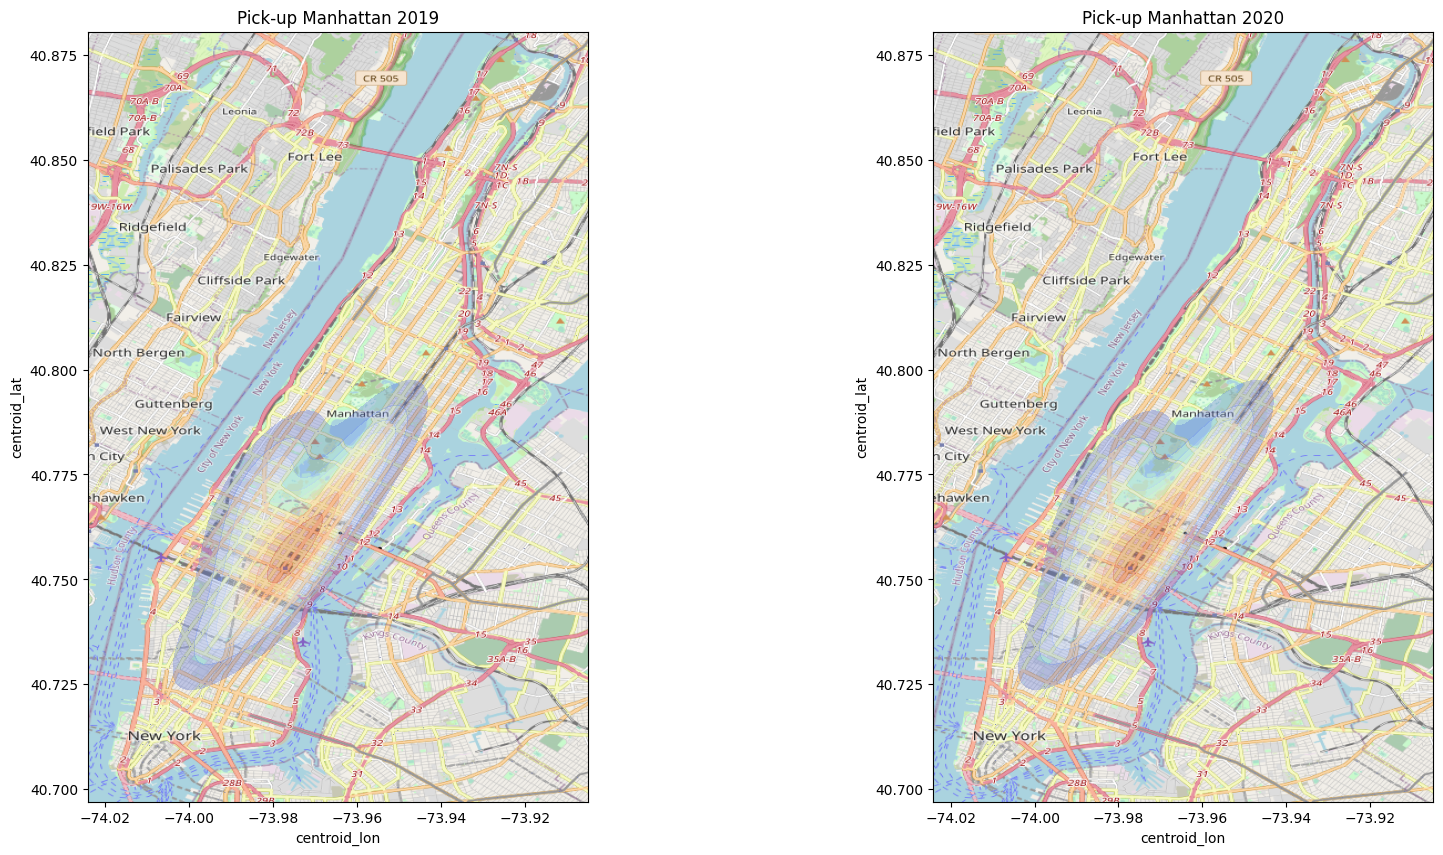

In [30]:
fig6, axs6 = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    manhattan_2019_df['centroid_lon'],
    manhattan_2019_df['centroid_lat'],
    np.log(manhattan_2019_df['pickup_count']),
    axs6[0],
    "Pick-up Manhattan 2019",
    manhattan_map,
    manhattan_image_boundaries_coordinates,
    1
)

plot_heatmap(
    manhattan_2020_df['centroid_lon'],
    manhattan_2020_df['centroid_lat'],
    np.log(manhattan_2020_df['pickup_count']),
    axs6[1],
    "Pick-up Manhattan 2020",
    manhattan_map,
    manhattan_image_boundaries_coordinates,
    1
)

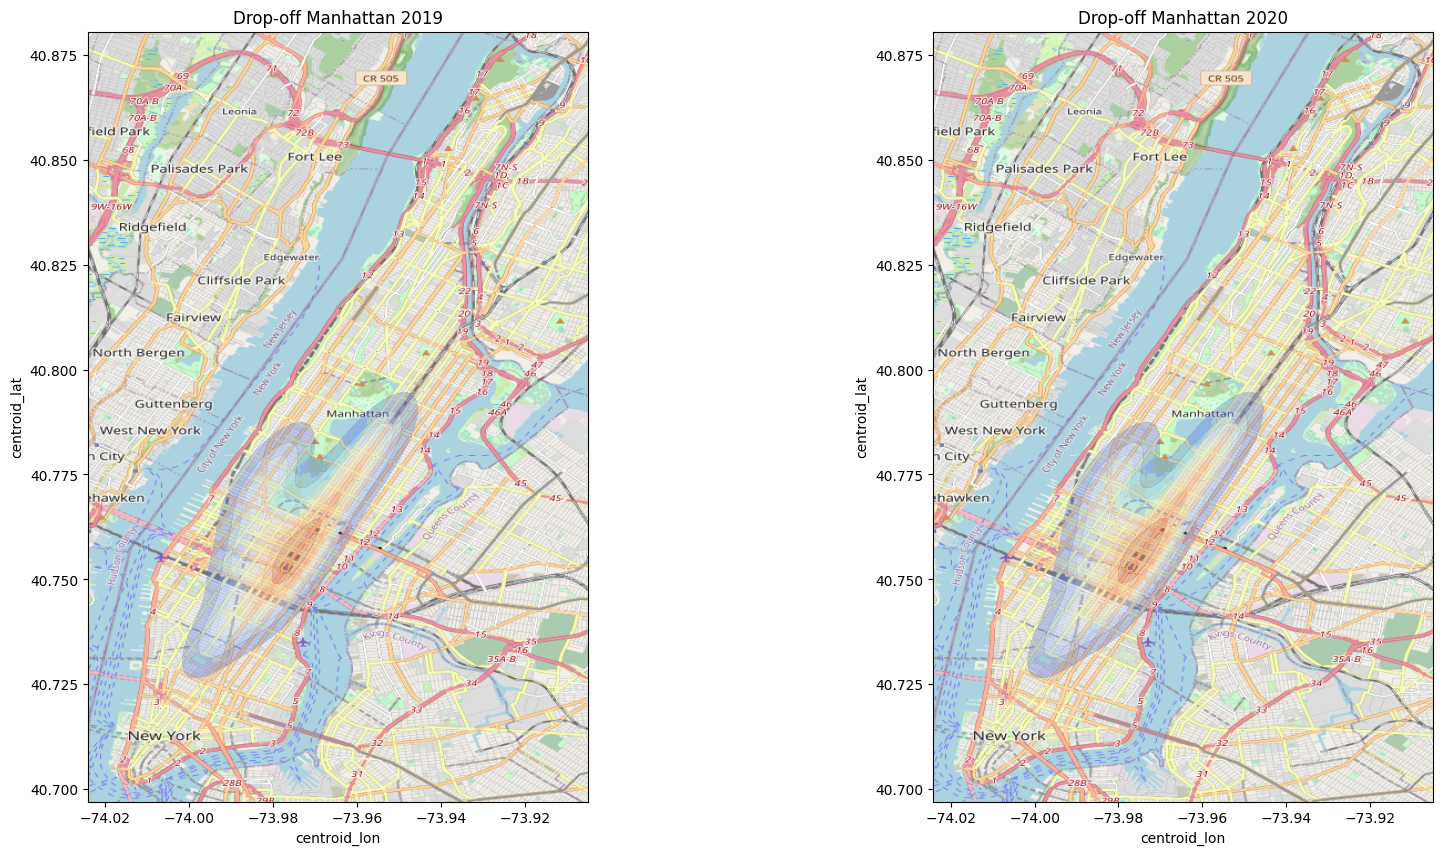

In [31]:
fig7, axs7 = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

plot_heatmap(
    manhattan_2019_df['centroid_lon'],
    manhattan_2019_df['centroid_lat'],
    np.log(manhattan_2019_df['dropoff_count']),
    axs7[0],
    "Drop-off Manhattan 2019",
    manhattan_map,
    manhattan_image_boundaries_coordinates,
    0.8
)

plot_heatmap(
    manhattan_2020_df['centroid_lon'],
    manhattan_2020_df['centroid_lat'],
    np.log(manhattan_2020_df['dropoff_count']),
    axs7[1],
    "Drop-off Manhattan 2020",
    manhattan_map,
    manhattan_image_boundaries_coordinates,
    0.8
)